# Analyzing Unstructured Data Exam 
# Author: Vy Tran - i6238350 
# Date: 05-04-2023
(In certain part of the code, chatGPT was used to support the analysis) 

## Text Analysis 

## Step 1: Prepare the data for processing

### Import the necessary libraries

In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string 
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from pyfixest.estimation import feols
from pyfixest.report import etable
import random 
import seaborn as sns
random.seed(100)

In [224]:
reviews = pd.read_csv(r'C:\Users\VY\Documents\Maastricht Uni\MSc BISS\Semester 2\Period 4\Analyzing Unstructured Data\Exam\Reviews30.csv')
reviews.head()

,Unnamed: 0,restaurant_name,rating_review,review_id,title_review,review_full,date,city,author_id
0,237560,The_Smith,5,review_648551245,Fantastic!,Came here for the first time today for breakfa...,2019-01-27,New_York_City_New_York,UID_43252
1,228100,Minetta_Tavern,5,review_738102640,"GREAT FOOD, FRIENDLY SERVICE, AMAZING INTERIOR...","About ten years ago, on a plane from Californi...",2020-01-09,New_York_City_New_York,UID_143008
2,49253,The_Bluebell_Cafe,5,review_699622231,Good dinner,We came here as it was close to our hotel. The...,2019-08-16,New_York_City_New_York,UID_40921
3,76270,Upland,5,review_341264648,Worth the wait.,The line at the door is a testament to how goo...,2016-01-19,New_York_City_New_York,UID_60517
4,115199,Avra_Estiatorio,5,review_213286772,Excellent seafood and oysters,Excellent seafood with a Greek twist. Try the ...,2014-07-02,New_York_City_New_York,UID_7943


### Check for missing values

In [225]:
reviews.isnull().sum()

Unnamed: 0         0
restaurant_name    0
rating_review      0
review_id          0
title_review       0
review_full        0
date               0
city               0
author_id          0
dtype: int64

### Make sure that the review data is in the correct format

In [226]:
reviews['title_review'] = reviews['title_review'].astype(str)
reviews['review_full'] = reviews['review_full'].astype(str)

To continue preparing the text, a review will be chosen to show the transformation through each step 
### Lower the text

In [227]:
reviews['review_full'][1002]

"I found this through a google search as we wanted a restaurant in the area and the reviews looked good. Well it was alright... The staff were polite & service was good. Food, a bit meh!  I had the meatballs and the pasta sauce was really tasty but the meat itself had a processed flavour as opposed to just seasoned ground beef like the meatballs I am used to. My sister had the quattro formaggi pizza which tasted like someone had left the top off the salt shaker and my son had a margarita which was stingy on the toppings so lacked flavour. It's not the worst place I've eaten but no better than average."

In [228]:
reviews['review_full'] = reviews['review_full'].str.lower()
reviews['review_full'][1002]

"i found this through a google search as we wanted a restaurant in the area and the reviews looked good. well it was alright... the staff were polite & service was good. food, a bit meh!  i had the meatballs and the pasta sauce was really tasty but the meat itself had a processed flavour as opposed to just seasoned ground beef like the meatballs i am used to. my sister had the quattro formaggi pizza which tasted like someone had left the top off the salt shaker and my son had a margarita which was stingy on the toppings so lacked flavour. it's not the worst place i've eaten but no better than average."

### Remove punctuation

In [229]:
# Create a function to remove punctuation
def remove_punctuations(text):
    for punctuation in string.punctuation:
        # Replace each punctuation with a space
        text = text.replace(punctuation, '')
    return text

# Apply the function to the review_full column
reviews['review_full'] = reviews['review_full'].apply(remove_punctuations)

# Check the result
reviews['review_full'][1002]

'i found this through a google search as we wanted a restaurant in the area and the reviews looked good well it was alright the staff were polite  service was good food a bit meh  i had the meatballs and the pasta sauce was really tasty but the meat itself had a processed flavour as opposed to just seasoned ground beef like the meatballs i am used to my sister had the quattro formaggi pizza which tasted like someone had left the top off the salt shaker and my son had a margarita which was stingy on the toppings so lacked flavour its not the worst place ive eaten but no better than average'

### Remove stopwords

In [230]:
# Get the set of stopwords 
stopwords = stopwords.words('english')

# Print part of the stopwords list 
print(stopwords[:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [231]:
# Remove the stopwords 
reviews['review_full'] = reviews['review_full'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords]))

# Check the result
reviews['review_full'][1002]

'found google search wanted restaurant area reviews looked good well alright staff polite service good food bit meh meatballs pasta sauce really tasty meat processed flavour opposed seasoned ground beef like meatballs used sister quattro formaggi pizza tasted like someone left top salt shaker son margarita stingy toppings lacked flavour worst place ive eaten better average'

### Remove unnecessary white spaces 
Unncessary white spaces in this case are extra white spaces at the beginning and end of the text

In [232]:
reviews['review_full'] = reviews['review_full'].str.strip()
reviews['review_full'][1002]

'found google search wanted restaurant area reviews looked good well alright staff polite service good food bit meh meatballs pasta sauce really tasty meat processed flavour opposed seasoned ground beef like meatballs used sister quattro formaggi pizza tasted like someone left top salt shaker son margarita stingy toppings lacked flavour worst place ive eaten better average'

### Stemming the text 

In [233]:
stemmer = SnowballStemmer("english")
reviews['review_full_stemmed'] = reviews['review_full'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))
reviews['review_full_stemmed'][1002]

'found googl search want restaur area review look good well alright staff polit servic good food bit meh meatbal pasta sauc realli tasti meat process flavour oppos season ground beef like meatbal use sister quattro formaggi pizza tast like someon left top salt shaker son margarita stingi top lack flavour worst place ive eaten better averag'

### Description of the text transformation 
In this step, several text preprocessing techniques were applied to the review_full column. The text was converted to lowercase, punctuation was removed, stopwords were removed, unnecessary white spaces were removed and the text was stemmed. First, the text was put into lower case so that the algorithm does not treat the same words differently (for example: GREAT should be treated the same as great). Next, punctuation was removed so that the text is simplified and the algorithm can focus on the words themselves. Stopwords were also removed because they don't contribute to the meaning of a sentence. To be more precise, the meaning of the text from of the review 1002 shown above doesn't change much after removing the stopwords. Unnecessary white spaces were removed to make the text cleaner. Lastly, stemming was applied to the text to reduce the words to their root form, which also helps the algorithm to focus on the meaning of the words (for example: change, changing, changed will all be reduced to 'chang').

## Step 2: Extract review sentiment 
In this step, the sentiment of the reviews will be extracted using the VADER sentiment analysis tool

In [234]:
sid = SentimentIntensityAnalyzer()
'''
Using this tool, negative values are negative valence and positive values are positive valence.
'''

'\nUsing this tool, negative values are negative valence and positive values are positive valence.\n'

### Extract sentiment for the review_full column

In [235]:
# Define a function that would return the compound polarity score of a text
def compute_polarity(text):
    # Compute sentiment scores
    scores = sid.polarity_scores(text)
    # Return the compound polarity score.
    return scores['compound']


In [236]:
# Apply the function to the review_full column
reviews['review_sentiment'] = reviews['review_full_stemmed'].apply(compute_polarity)

# Check the result
reviews[['review_full_stemmed', 'review_sentiment']].head(10)

,review_full_stemmed,review_sentiment
0,came first time today breakfast 100 back fanta...,0.8442
1,ten year ago plane california new york husband...,0.9928
2,came close hotel place pretti empti weekday se...,0.8176
3,line door testament good food definit worth wa...,0.5859
4,excel seafood greek twist tri seabass appet se...,0.7430
5,back first trip ny lucki enough watch superbow...,0.9349
6,restaur welcom waiter friend decor nice place ...,0.7783
7,great littl spot excel menu awesom servic food...,0.9722
8,breakfast platter good well price 2 omelett pl...,0.7579
9,blt 1 day worth write home back irish breakfas...,-0.0160


In [237]:
reviews['review_sentiment'].describe()

count    2000.000000
mean        0.754590
std         0.322457
min        -0.892400
25%         0.718275
50%         0.880700
75%         0.945100
max         0.996900
Name: review_sentiment, dtype: float64

## Step 3: Investigate relationship between sentiment and restaurant rating 

To investigate the relationship between sentiment and restaurant ratings through graph, the data will be plotted using a boxplot and a bar plot. The boxplot will be used to visualize the distribution of the sentiment scores for each restaurant rating. The bar plot will be used to visualize the average sentiment score for each restaurant rating. 

### Boxplot

![boxplot.png]

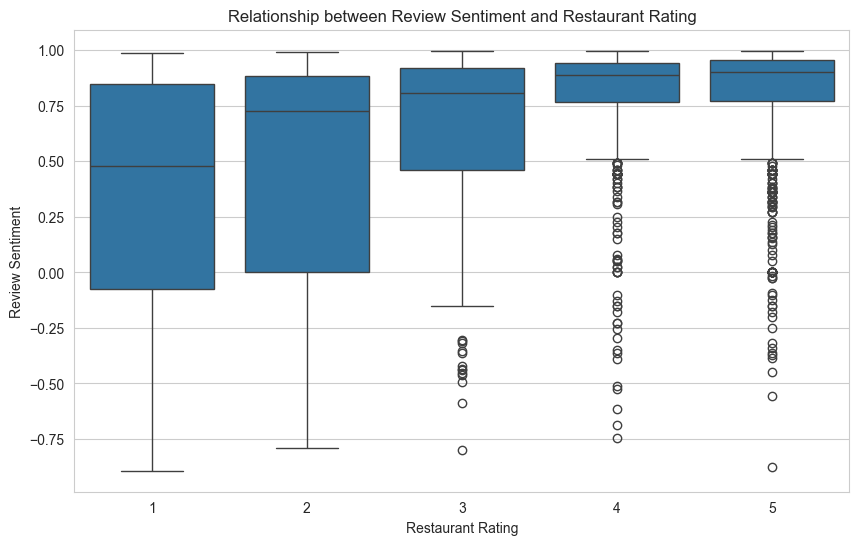

In [238]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='rating_review', y='review_sentiment', data=reviews)
plt.title('Relationship between Review Sentiment and Restaurant Rating')
plt.xlabel('Restaurant Rating')
plt.ylabel('Review Sentiment')
plt.show()

Looking at the boxplot, it is clear that restaurants with rating 1 has the highest review sentiment distribution compared to other ratings, the review sentiment can go as low as almost -1 to as high as 1. Restaurants with higher rating tend to have higher sentiment scores and lower range. The median of review sentiment increase as the rating for the restaurant increases. However, there are a lot of outliers sentiment scores for restaurant with ratings 3,4 and 5. Nevertheless, there seems to be a trend that the sentiment of the reviews is positively correlated with the rating of the restaurant.

### Bar plot

In [239]:
![barplot.png]

'[barplot.png]' is not recognized as an internal or external command,
operable program or batch file.


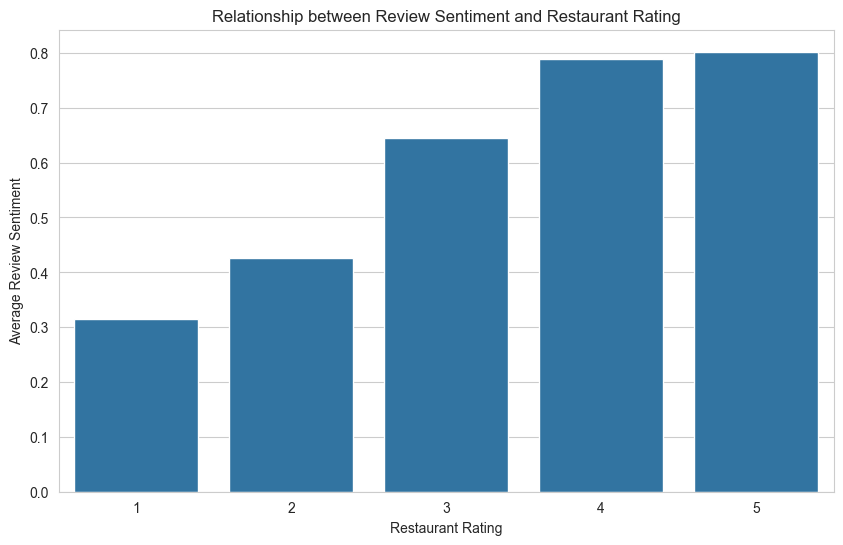

In [240]:
plt.figure(figsize=(10, 6)) 
sns.barplot(x='rating_review', y='review_sentiment', data=reviews, errorbar=None)

# Set the title and labels
plt.title('Relationship between Review Sentiment and Restaurant Rating')
plt.xlabel('Restaurant Rating')
plt.ylabel('Average Review Sentiment')

# Show the plot
plt.show()

Looking at the bar plot, it became even more obvious that there is a correlation between the review sentiment and the restaurant rating. We can also see that the overall mean of the sentiment score in all restaurant ratings is positive, which also aligns with the finding when "describe" function was used to describe the sentiment score.

## Step 4: Estimate a linear regression model

### Extract day, week, month and year from the review date 

In [241]:
# Convert argument to datetime 
reviews['review_date'] = pd.to_datetime(reviews['date'])

# Extract day of the week, week, month and year from the review date
reviews['day_of_week'] = reviews['review_date'].dt.day_name() #If we use dt.dayofweek -> return value are integers, Monday is denoted by 0 and Sunday is denoted by 6
reviews['week'] = reviews['review_date'].dt.isocalendar().week #Return the week number of the year
reviews['month'] = reviews['review_date'].dt.month
reviews['year'] = reviews['review_date'].dt.year

# Check the result
reviews[['review_date', 'day_of_week', 'week', 'month', 'year']].head()

,review_date,day_of_week,week,month,year
0,2019-01-27,Sunday,4,1,2019
1,2020-01-09,Thursday,2,1,2020
2,2019-08-16,Friday,33,8,2019
3,2016-01-19,Tuesday,3,1,2016
4,2014-07-02,Wednesday,27,7,2014


In [242]:
# Make sure that these variables are in the correct format
reviews['day_of_week'].astype('category')
reviews['week'].astype('category')
reviews['month'].astype('category')
reviews['restaurant_name'].astype('category')
reviews['year'].astype('category')

0       2019
1       2020
2       2019
3       2016
4       2014
        ... 
1995    2019
1996    2015
1997    2017
1998    2012
1999    2019
Name: year, Length: 2000, dtype: category
Categories (16, int32): [2005, 2006, 2007, 2008, ..., 2017, 2018, 2019, 2020]

### Run the regression model 
To take into account the fact that there are restaurants that got reviewed multiple times and the date of the review, a fixed effect model will be used to estimate the relationship between the review sentiment and the restaurant rating. The function feols from the pyfixest library will be used to estimate the fixed effect model. Here, the function control the effect of the day of the week, week, month, year and restaurant name (which are all repeated on the dataset).

In [243]:
reg_model = feols("rating_review ~ review_sentiment| day_of_week + week + month + year + restaurant_name", data=reviews)

In [244]:
reg_model.tidy()

,Estimate,Std. Error,t value,Pr(>|t|),2.5%,97.5%
Coefficient,,,,,,
review_sentiment,0.749247,0.091098,8.224658,0.000174,0.526339,0.972155


From the result, it is clear that the review sentiment score is highly corrected with the review rating (after controlling the number of times the restaurant got reviewed, the day of the week, the week, the month and the year of the review) since the p-value is smaller than 0.05 and the coefficient is positive. This means that the review sentiment score has a positive impact on the restaurant rating.

## Step 5: Impact of sentiment scores  and day of the week on the restaurant rating 

Here, we would investigate the impact of review sentiment and the day of the week on the restaurant rating. We still have to control the week, month, year and the name of the restaurant in the model. Since we want to estimate the impact of sentiment_score, depending on the day of the week, we will use the interaction term review_sentiment * day_of_week in the model.

In [245]:
reg_model_dow = feols("rating_review ~ review_sentiment * day_of_week | week + month + year + restaurant_name ", data=reviews)
reg_model_dow.tidy()

,Estimate,Std. Error,t value,Pr(>|t|),2.5%,97.5%
Coefficient,,,,,,
review_sentiment,0.400163,0.255277,1.567564,0.123049,-0.112088,0.912415
day_of_week[T.Monday],-0.630300,0.217407,-2.899172,0.005468,-1.066558,-0.194041
day_of_week[T.Saturday],-0.649745,0.219458,-2.960680,0.004616,-1.090119,-0.209370
day_of_week[T.Sunday],0.098686,0.312058,0.316242,0.753085,-0.527504,0.724876
day_of_week[T.Thursday],0.136256,0.263215,0.517662,0.606889,-0.391923,0.664436
day_of_week[T.Tuesday],-0.316590,0.321955,-0.983339,0.329994,-0.962640,0.329459
day_of_week[T.Wednesday],-0.385497,0.278867,-1.382368,0.172768,-0.945085,0.174091
review_sentiment:day_of_week[T.Monday],0.686826,0.267219,2.570272,0.013066,0.150612,1.223041
review_sentiment:day_of_week[T.Saturday],0.758485,0.263938,2.873726,0.005862,0.228855,1.288116


From the result, in this model, the review_sentiment score alone is not significant in predicting the restaurant rating. However, Monday and Saturday have a significant impact on the restaurant rating. The interaction term between review_sentiment and day_of_week Monday and Saturday are also significant. To be more precise, the review sentiment score made on Monday and Saturday seem to result in higher restaurant ratings.

## Step 6: Interpretation of the results

When looking at the two model side by side, we can see when including the effect of day of the week, the R-squared value increased by around 1%, indicating that including this variable helps to understand the model a tiny bit more. The review sentiment score alone is significant in predicting the restaurant rating, higher review sentiment score results in higher restaurant rating. However, when including the day of the week, we can see different result as the review sentiment do not significantly impact the review sentiment anymore. It seems like Monday and Saturday in general have lower restaurant reviews (and the result is significant). However, the positive review sentiment score on Monday and Saturday have greater positive impact on the review ratings compared to other days of the week. 

In [246]:
etable(models= [reg_model, reg_model_dow], title='Results of the regression models')

                                                       est1              est2
-----------------------------------------  ----------------  ----------------
depvar                                        rating_review     rating_review
-----------------------------------------------------------------------------
review_sentiment                           0.749*** (0.091)     0.400 (0.255)
day_of_week[T.Monday]                                        -0.630** (0.217)
day_of_week[T.Saturday]                                      -0.650** (0.219)
day_of_week[T.Sunday]                                           0.099 (0.312)
day_of_week[T.Thursday]                                         0.136 (0.263)
day_of_week[T.Tuesday]                                         -0.317 (0.322)
day_of_week[T.Wednesday]                                       -0.385 (0.279)
review_sentiment:day_of_week[T.Monday]                         0.687* (0.267)
review_sentiment:day_of_week[T.Saturday]                      0.

##  Image Analysis 

## Step 7: Apply Eigenface method to the image data

### Import 200 images from neutrality dataset and 200 images from other emotions dataset

#### Import necessary libraries 

In [247]:
import os 
import zipfile 
import cv2
from sklearn.decomposition import PCA
from skimage.feature import hog, local_binary_pattern
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
random.seed(100)

#### Extract the zip files

In [248]:
zip_file_path = r"C:\Users\VY\Documents\Maastricht Uni\MSc BISS\Semester 2\Period 4\Analyzing Unstructured Data\Exam\Face data for students.zip"
extracted_folder = r"C:\Users\VY\Documents\Maastricht Uni\MSc BISS\Semester 2\Period 4\Analyzing Unstructured Data\Exam\Face data for students"

In [249]:
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)

#### Define the path to the images

In [250]:
# Create the path leads to my target emotion -> neutrality
neutrality_path = r"C:\Users\VY\Documents\Maastricht Uni\MSc BISS\Semester 2\Period 4\Analyzing Unstructured Data\Exam\Face data for students\neutrality"

# Create the path leads to other emotions
other_emotion_path = [r"C:\Users\VY\Documents\Maastricht Uni\MSc BISS\Semester 2\Period 4\Analyzing Unstructured Data\Exam\Face data for students\anger",
                        r"C:\Users\VY\Documents\Maastricht Uni\MSc BISS\Semester 2\Period 4\Analyzing Unstructured Data\Exam\Face data for students\contempt",
                      r"C:\Users\VY\Documents\Maastricht Uni\MSc BISS\Semester 2\Period 4\Analyzing Unstructured Data\Exam\Face data for students\disgust",
                      r"C:\Users\VY\Documents\Maastricht Uni\MSc BISS\Semester 2\Period 4\Analyzing Unstructured Data\Exam\Face data for students\fear",
                      r"C:\Users\VY\Documents\Maastricht Uni\MSc BISS\Semester 2\Period 4\Analyzing Unstructured Data\Exam\Face data for students\happiness",
                      r"C:\Users\VY\Documents\Maastricht Uni\MSc BISS\Semester 2\Period 4\Analyzing Unstructured Data\Exam\Face data for students\sadness",
                      r"C:\Users\VY\Documents\Maastricht Uni\MSc BISS\Semester 2\Period 4\Analyzing Unstructured Data\Exam\Face data for students\surprise"]

#### Load the images

In [251]:
# Load all the images from the neutrality dataset
neutrality_images = []

for image_path in os.listdir(neutrality_path):
    full_image_path = os.path.join(neutrality_path, image_path)
    img = cv2.imread(full_image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (128, 128))
    neutrality_images.append(img)

In [252]:
# Load all the images from other emotions dataset
other_emotion_images = []

for emotion_path in other_emotion_path:
    for image_path in os.listdir(emotion_path):
        full_image_path = os.path.join(emotion_path, image_path)
        img = cv2.imread(full_image_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (128, 128))
        other_emotion_images.append(img) 

#### Subset the images from the datasets

In [253]:
# Randomly select 200 images from neutrality images
neutrality_sample = random.sample(neutrality_images, 200)

# Randomly select 200 images from other emotions
other_emotion_sample = random.sample(other_emotion_images, 200)

#### Combine the dataset and create binary identifier

In [254]:
# Create the label for the images
neutrality_label = [1] * 200
other_emotion_label = [0] * 200

# Combine the images and the labels
images = neutrality_sample + other_emotion_sample
labels = neutrality_label + other_emotion_label

# Convert the images and labels to a pandas dataframe
data_label = pd.DataFrame({'image': images, 'label': labels}) 

In [255]:
data_label.head() # When the image get transformed into a dataframe, the image will be transformed into a list of pixel values

,image,label
0,"[[134, 154, 148, 147, 150, 152, 154, 158, 162,...",1
1,"[[254, 254, 254, 254, 254, 254, 254, 254, 254,...",1
2,"[[65, 56, 40, 38, 33, 37, 34, 32, 34, 41, 50, ...",1
3,"[[116, 117, 124, 126, 127, 128, 99, 95, 120, 1...",1
4,"[[45, 43, 29, 38, 44, 45, 51, 42, 36, 47, 47, ...",1


### Preprocess the images so that we can apply Eigenface method
Since we do not have to look at the labels yet, we will work with the images only for now. -> make use of the images folder  

#### Compute a matrix of the images 

In [256]:
image_matrix = np.array(images)
print(" The shape of the image matrix is: ", image_matrix.shape)

# Original shape of the image matrix has 3 dimensions but we want to transform it to 2 dimensions
image_matrix = np.reshape(image_matrix, (len(images), -1))
print(" The shape of the image matrix after reshaping is: ", image_matrix.shape)

 The shape of the image matrix is:  (400, 128, 128)
 The shape of the image matrix after reshaping is:  (400, 16384)


#### Compute the "average face" 

In [257]:
average_face = np.mean(image_matrix, axis=0)
average_face = average_face.reshape(128, 128).astype(np.uint8)

#### Plot the average face

![average_face.png]

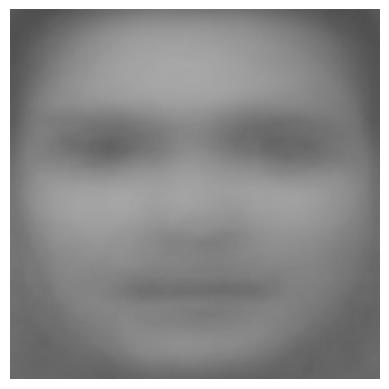

In [258]:
plt.imshow(average_face, cmap="gray", vmin = 0, vmax = 255)
plt.axis("off")
plt.show()

### Apply PCA to the image matrix

#### Fit the PCA model and determine the number of principal components to explain at least 85% of the variance 

In [259]:
# Fit the PCA model
pca = PCA() 
pca.fit(image_matrix)

# Determine the number of principal components to explain at least 85% of the variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
n_components = np.argmax(cumulative_variance_ratio >= 0.85) + 1
print("The number of components needed to explain at least 85% of the variance are: ", n_components)

The number of components needed to explain at least 85% of the variance are:  43


#### Apply PCA with 43 components 

In [260]:
pca_final = PCA(n_components=43)
image_matrix_pca = pca_final.fit_transform(image_matrix)
print("The shape of the image matrix after applying PCA is: ", image_matrix_pca.shape)

The shape of the image matrix after applying PCA is:  (400, 43)


#### Plot the eigenfaces 

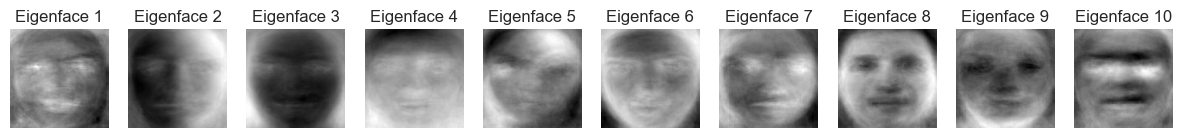

In [261]:
fig, axes = plt.subplots(1, 10, figsize=(15, 5))

for i in range(10):
    eigenface = pca_final.components_[i, :].reshape(128, 128)
    axes[i].imshow(eigenface, cmap="gray")
    axes[i].set_title(f"Eigenface {i + 1}")
    axes[i].axis("off")
plt.show()

### Create Eigenface loading as features per image 

In [262]:
# Create Eigenface loadings as features per image
eigenvectors = pca_final.components_[:n_components]
image_loadings = pca.transform(image_matrix)[:, :len(eigenvectors)] 

In [263]:
image_loadings_df = pd.DataFrame(image_loadings, columns=[f'eigenface_{i + 1}' for i in range(n_components)]) # In this dataframe, each images are represented by a row, and each column represents the loading of the image on the corresponding eigenface, higher value indicating that the image has more of that eigenface
image_loadings_df.head()

,eigenface_1,eigenface_2,eigenface_3,eigenface_4,eigenface_5,eigenface_6,eigenface_7,eigenface_8,eigenface_9,eigenface_10,...,eigenface_34,eigenface_35,eigenface_36,eigenface_37,eigenface_38,eigenface_39,eigenface_40,eigenface_41,eigenface_42,eigenface_43
0,2882.559930,-2041.521544,367.012895,-358.975112,-1916.385512,416.805039,798.207620,-839.887666,-412.382937,-167.586990,...,100.818016,-26.231702,268.580545,375.213567,81.241659,-9.534389,-205.951608,-335.365031,310.864623,-805.345572
1,-5408.562816,-2143.241567,1752.687371,-2556.140665,295.786593,1328.036850,2019.144533,-800.333105,-209.787380,-979.440087,...,693.118119,849.351516,380.115477,460.965492,-397.468739,-233.547067,491.544070,400.656655,-414.755200,-166.127391
2,-673.835085,15.103831,-1614.603652,990.017585,1009.110615,257.154760,-119.993358,-120.058393,133.699942,-134.696264,...,27.634423,-115.930070,-167.645765,-17.527418,222.597202,50.692716,273.255393,-5.317881,-259.170434,-160.096975
3,3663.178846,-7126.524795,-385.226658,-2833.941423,-315.881276,-656.614588,-2674.896814,933.152622,-834.928819,-71.330419,...,-427.395453,232.541651,80.118299,-294.326031,-627.938995,-866.470142,-352.673754,91.326740,-101.081633,-735.417578
4,-363.866243,-132.327965,2066.267317,3180.125777,-601.715247,-3383.302688,-1562.297735,-640.687859,1520.358168,-625.288670,...,-91.680163,263.928698,-163.956640,276.778678,395.416598,-61.455297,-135.179473,13.966725,-94.343371,-28.464206


In [264]:
# Merge the image loadings into the data_label dataframe
data_label = pd.concat([data_label, image_loadings_df], axis=1)

## Step 8: Extract two types of algorithmic image features from the images dataset 

### Extract Local Binary Pattern (LBP) features

In [265]:
# Define a function to extract LBP features
def extract_lbp_features(image):
    radius = 3
    n_points = 8 * radius
    lbp = local_binary_pattern(image, n_points, radius, method='uniform')
    n_bins = 26
    hist, _ = np.histogram(lbp.ravel(), bins=n_bins, range=(0, n_bins))
    return hist

# Extract LBP features for each image
lbp_features = []
for img in images:
    lbp_hist = extract_lbp_features(img)
    lbp_features.append(lbp_hist)

In [266]:
# Convert the list of LBP features into a dataframe 
lbp_features_df = pd.DataFrame(lbp_features, columns=[f'lbp_{i + 1}' for i in range(26)])

# Merge this feature into the data_label dataframe
data_label = pd.concat([data_label, lbp_features_df], axis=1)

In [267]:
data_label.head()

,image,label,eigenface_1,eigenface_2,eigenface_3,eigenface_4,eigenface_5,eigenface_6,eigenface_7,eigenface_8,...,lbp_17,lbp_18,lbp_19,lbp_20,lbp_21,lbp_22,lbp_23,lbp_24,lbp_25,lbp_26
0,"[[134, 154, 148, 147, 150, 152, 154, 158, 162,...",1,2882.559930,-2041.521544,367.012895,-358.975112,-1916.385512,416.805039,798.207620,-839.887666,...,406,411,275,232,240,220,193,157,561,3097
1,"[[254, 254, 254, 254, 254, 254, 254, 254, 254,...",1,-5408.562816,-2143.241567,1752.687371,-2556.140665,295.786593,1328.036850,2019.144533,-800.333105,...,477,421,340,297,274,256,259,150,864,3705
2,"[[65, 56, 40, 38, 33, 37, 34, 32, 34, 41, 50, ...",1,-673.835085,15.103831,-1614.603652,990.017585,1009.110615,257.154760,-119.993358,-120.058393,...,328,271,244,211,233,275,298,219,473,4408
3,"[[116, 117, 124, 126, 127, 128, 99, 95, 120, 1...",1,3663.178846,-7126.524795,-385.226658,-2833.941423,-315.881276,-656.614588,-2674.896814,933.152622,...,338,486,246,242,240,257,238,263,2123,3878
4,"[[45, 43, 29, 38, 44, 45, 51, 42, 36, 47, 47, ...",1,-363.866243,-132.327965,2066.267317,3180.125777,-601.715247,-3383.302688,-1562.297735,-640.687859,...,320,299,165,173,130,149,159,178,475,2721


### Create HOG features

#### Extract the HOG features using a sample image first 

In [268]:
# Sample image (replace this with the actual image from your dataset)
sample_image = neutrality_sample[0]

# Resize the image to standard HOG size
sample_image = cv2.resize(sample_image, (64, 128))

# Extract HOG features
hog_feature, hog_image = hog(sample_image, orientations=8, pixels_per_cell=(16, 16),
                              cells_per_block=(1, 1), visualize=True)

#### Visualize the HOG features of the sample image

![hog_features.png]

(-0.5, 63.5, 127.5, -0.5)

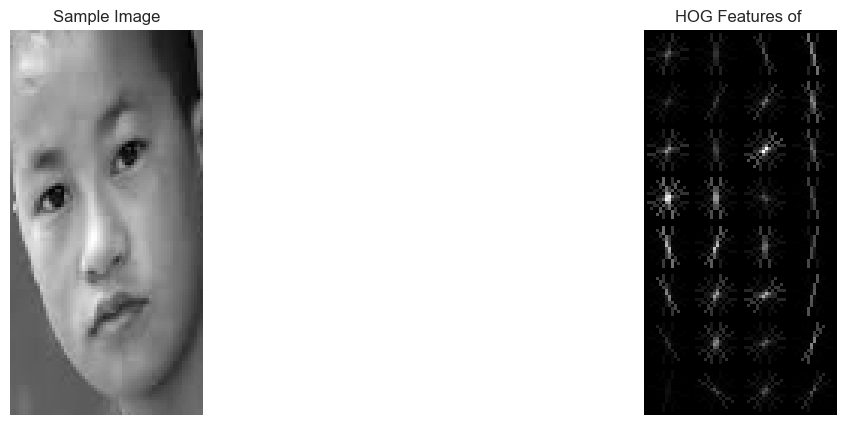

In [269]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].imshow(sample_image, cmap='gray')
axes[0].set_title('Sample Image')
axes[0].axis('off')

axes[1].imshow(hog_image, cmap='gray')
axes[1].set_title('HOG Features of ')
axes[1].axis('off')


#### Extract HOG features for all images

In [270]:
# Extract HOG features for all images
hog_images = []

hog_features = []
for img in images:
    img = cv2.resize(img, (64, 128))
    hog_feature, hog_image = hog(img, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True)
    hog_features.append(hog_feature)
    hog_images.append(hog_image)


In [271]:
# Convert the list of HOG features into a dataframe
hog_features_df = pd.DataFrame(hog_features, columns=[f'hog_{i + 1}' for i in range(len(hog_features[0]))])
hog_features_df.shape

# The total number of HOG features extracted 

(400, 256)

In [272]:
# Merge this feature into the data_label dataframe
data_label = pd.concat([data_label, hog_features_df], axis=1)

## Step 9: Explain the chosen features and their importance

### Which features to choose? 

There are multiple criterias to choose which algorithmic image features to extract. 
- First of all, the pictures are all in grayscale so the color features are eliminated 
- Secondly, the main task of this analysis is to predict the emotion of the images, so the features that are extracted should be able to help extract that information.

Based on these critertias, four features were experimented, two of them extract the textual of the images (Local Binary Patterns and Gabor filters) and other one to extract the feature descriptor HOG (Histogram of Oriented Gradients) and the last one to extract the line in the images (Houghline features). In the end, only LBP and HOG was chosen to continue with. The Gabor filter takes too much computational effort and the result with Houghline was not effective when applying to the predictive model (this might also be because when applying houghline function from cv2, despite trying to lower the threshold, really little lines were drawn).According to (Mukeshimana, M., Niyongere, A., & Ndikumagenge, J. (2023). Facial Emotion Recognition Feature Extraction: A Survey. IntechOpen. doi: 10.5772/intechopen.110597), there are two types of facial expression features (1) local appearance features, which extract the apprearance changes of the face of a region of the face and (2) geometric features which express the shape of the facial components. LBP and HOG are two of the most popular local appearance features that are used to extract the texture of the face. LBP is used to extract the texture of the face by comparing the intensity of the pixel with its neighbors and HOG is used to extract the shape of the face by comparing the intensity of the pixel with its neighbors. These two features are chosen because they are able to extract the texture and shape of the face which are important in predicting the emotion of the images. 

### Importance of the LBP features 

Taking a look at the LBP feature extracted in the first image. This histogram shows the frequency of the LBP values in the image. The LBP values are calculated by comparing the intensity of the pixel with its neighbors. The histogram shows that the LBP values are distributed across the 26 bins. The LBP features are important in predicting the emotion of the images because they capture the texture of the face. Comparing the histogram of the first image in the dataset (which is a label 1) and the last image of the dataset (which is a label 0), we can see the difference in textual distribution. The first image has a higher frequency of LBP values in the middle compared to the last image. This indicates that the first image has a different texture compared to the last image. Thus, this feature can be used to predict the emotion of the images.

![lbp_features.png]

Text(0, 0.5, 'Frequency')

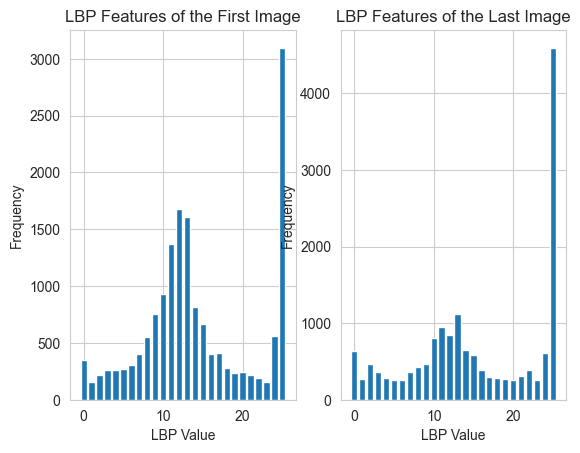

In [273]:
# Plot the LBP features of the first and the last images 
plt.subplot(1, 2, 1)
plt.bar(range(26), lbp_features[0])
plt.title('LBP Features of the First Image')
plt.xlabel('LBP Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.bar(range(26), lbp_features[-1])
plt.title('LBP Features of the Last Image')
plt.xlabel('LBP Value')
plt.ylabel('Frequency')

### Importance of the HOG features

As mentioned above, the HOG feature is also a famous feature used for emotion recognition. Looking at the visualization of the first image and the last image in this dataset, we can see that the lines drawn to visualize the two pictures are different. 

![hog_features_firstvslast.png]

(-0.5, 127.5, 127.5, -0.5)

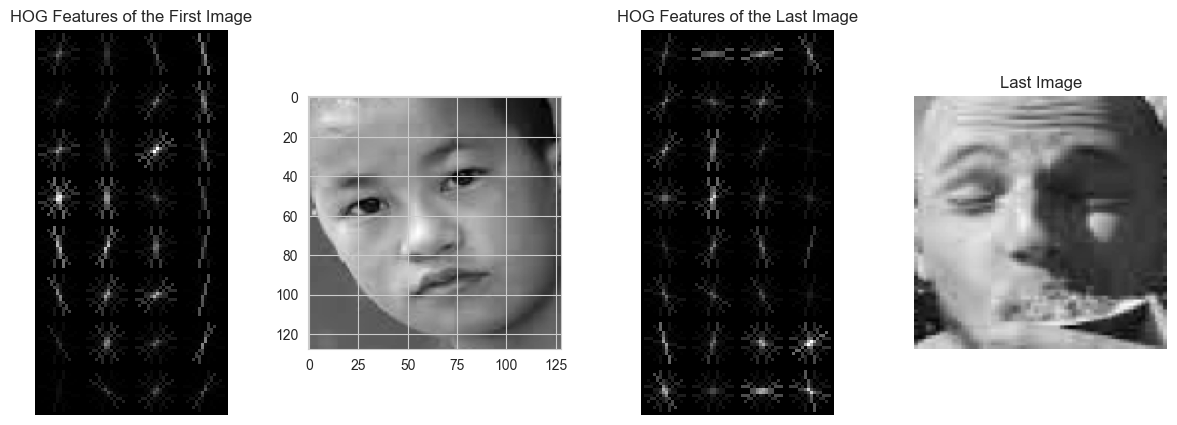

In [274]:
# Plot the HOG images of the first and the last images
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

axes[0].imshow(hog_images[0], cmap='gray')
axes[0].set_title('HOG Features of the First Image')
axes[0].axis('off')

axes[1].imshow(images[0], cmap='gray')
axes[2].set_title('First Image')
axes[2].axis('off')


axes[2].imshow(hog_images[-1], cmap='gray')
axes[2].set_title('HOG Features of the Last Image')
axes[2].axis('off')

axes[3].imshow(images[-1], cmap='gray')
axes[3].set_title('Last Image')
axes[3].axis('off')

We can also look at what this visualization means in terms of actual values that would be fed into the predictive model by looking at the HOG features of the first and the last images. The HOG features are used to extract the shape of the face. The HOG features are calculated by comparing the intensity of the pixel with its neighbors. Looking at the histogram value of the HOG value for the first and the last picture, we can see that there are differences in the distribution of the HOG values, both in frequency adn value ranges. This indicates that this value can be and option used to differentiate between the two images.

![hog_features_firstvslast_histogram.png]

Text(0, 0.5, 'Frequency')

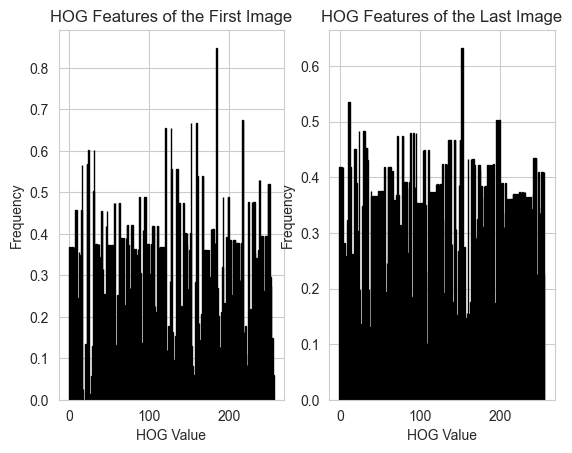

In [275]:
# Plot the HOG features of the first and the last images
plt.subplot(1, 2, 1)
plt.bar(range(len(hog_features[0])), hog_features[0], edgecolor='black')
plt.title('HOG Features of the First Image')
plt.xlabel('HOG Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.bar(range(len(hog_features[-1])), hog_features[-1], edgecolor='black')
plt.title('HOG Features of the Last Image')
plt.xlabel('HOG Value')
plt.ylabel('Frequency')

## Step 10: Train a machine learning model to predict the emotion of the images

Since we have to develop three model configuration, the dataset used for all features is called "data_label", the dataset used for only eigenface is called "data_eigenface" and the dataset used for only LBP and HOG features is called "data_features".

### Predictive model using SVM

#### SVM model using all features 

In [276]:
# Check to see the final dataset
data_label.head()

,image,label,eigenface_1,eigenface_2,eigenface_3,eigenface_4,eigenface_5,eigenface_6,eigenface_7,eigenface_8,...,hog_247,hog_248,hog_249,hog_250,hog_251,hog_252,hog_253,hog_254,hog_255,hog_256
0,"[[134, 154, 148, 147, 150, 152, 154, 158, 162,...",1,2882.559930,-2041.521544,367.012895,-358.975112,-1916.385512,416.805039,798.207620,-839.887666,...,0.393585,0.341901,0.519187,0.519187,0.519187,0.295675,0.273902,0.058734,0.148206,0.058935
1,"[[254, 254, 254, 254, 254, 254, 254, 254, 254,...",1,-5408.562816,-2143.241567,1752.687371,-2556.140665,295.786593,1328.036850,2019.144533,-800.333105,...,0.085175,0.062253,0.558646,0.412053,0.127772,0.188128,0.157868,0.293039,0.208638,0.558646
2,"[[65, 56, 40, 38, 33, 37, 34, 32, 34, 41, 50, ...",1,-673.835085,15.103831,-1614.603652,990.017585,1009.110615,257.154760,-119.993358,-120.058393,...,0.387251,0.387251,0.540609,0.540609,0.308566,0.047558,0.103478,0.079900,0.093054,0.540609
3,"[[116, 117, 124, 126, 127, 128, 99, 95, 120, 1...",1,3663.178846,-7126.524795,-385.226658,-2833.941423,-315.881276,-656.614588,-2674.896814,933.152622,...,0.418406,0.418406,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,"[[45, 43, 29, 38, 44, 45, 51, 42, 36, 47, 47, ...",1,-363.866243,-132.327965,2066.267317,3180.125777,-601.715247,-3383.302688,-1562.297735,-640.687859,...,0.190643,0.165320,0.554752,0.554752,0.554752,0.205534,0.111755,0.055214,0.129399,0.047163


In [277]:
X = data_label.drop(columns=['image', 'label'])
y = data_label['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [278]:
# Fit the SVM model
svm_model_all = svm.SVC()
svm_model_all.fit(X_train, y_train)

SVC()

In [279]:
# Predict the labels
y_pred = svm_model_all.predict(X_test)

In [280]:
# Evaluate the model
accuracy_svm_all = round(accuracy_score(y_test, y_pred), 2)
recall_svm_all = round(recall_score(y_test, y_pred),2)
precision_svm_all = round(precision_score(y_test, y_pred),2)
f1_svm_all = round(f1_score(y_test, y_pred))

print("The accuracy of the SVM model using all features is: ", accuracy_svm_all)
print("The recall of the SVM model using all features is: ", recall_svm_all)
print("The precision of the SVM model using all features is: ", precision_svm_all)
print("The F1 score of the SVM model using all features is: ", f1_svm_all)

The accuracy of the SVM model using all features is:  0.55
The recall of the SVM model using all features is:  0.51
The precision of the SVM model using all features is:  0.54
The F1 score of the SVM model using all features is:  1


#### SVM model using only Eigenface features

In [281]:
data_eigenface = data_label[['label'] + ['image'] + [f'eigenface_{i + 1}' for i in range(n_components)]]
X_eigenface = data_eigenface.drop(columns=['image', 'label'])
y_eigenface = data_eigenface['label']
X_train_eigenface, X_test_eigenface, y_train_eigenface, y_test_eigenface = train_test_split(X_eigenface, y_eigenface, test_size=0.2, random_state=100)

In [282]:
# Fit the SVM model
svm_model_eigenface = svm.SVC()
svm_model_eigenface.fit(X_train_eigenface, y_train_eigenface)

SVC()

In [283]:
# Predict the labels
y_pred_svm_eigenface = svm_model_eigenface.predict(X_test_eigenface)

In [284]:
# Evaluate the model 
accuracy_svm_eigenface = accuracy_score(y_test_eigenface, y_pred_svm_eigenface)
recall_svm_eigenface = recall_score(y_test_eigenface, y_pred_svm_eigenface)
precision_svm_eigenface = precision_score(y_test_eigenface, y_pred_svm_eigenface)
f1__svmeigenface = f1_score(y_test_eigenface, y_pred_svm_eigenface)
print("The accuracy of the SVM model using only Eigenface features is: ", round(accuracy_svm_eigenface, 2))
print("The recall of the SVM model using only Eigenface features is: ", round(recall_svm_eigenface,2))
print("The precision of the SVM model using only Eigenface features is: ", round(precision_svm_eigenface,2))
print("The F1 score of the SVM model using only Eigenface features is: ", round(f1__svmeigenface,2))

The accuracy of the SVM model using only Eigenface features is:  0.55
The recall of the SVM model using only Eigenface features is:  0.56
The precision of the SVM model using only Eigenface features is:  0.54
The F1 score of the SVM model using only Eigenface features is:  0.55


#### SVM model using only LBP and HOG features

In [285]:
data_features = data_label[['label'] + ['image'] + [f'lbp_{i + 1}' for i in range(26)] + [f'hog_{i + 1}' for i in range(len(hog_features[0]))]]
X_features = data_features.drop(columns=['image', 'label'])
y_features = data_features['label']
X_train_features, X_test_features, y_train_features, y_test_features = train_test_split(X_features, y_features, test_size=0.2, random_state=100)

In [286]:
# Fit the SVM model
svm_model_features = svm.SVC()
svm_model_features.fit(X_train_features, y_train_features)

SVC()

In [287]:
# Predict the labels
y_pred_svm_features = svm_model_features.predict(X_test_features)

In [288]:
# Evaluate the model
accuracy_svm_features = accuracy_score(y_test_features, y_pred_svm_features)
recall_svm_features = recall_score(y_test_features, y_pred_svm_features)
precision_svm_features = precision_score(y_test_features, y_pred_svm_features)
f1_svm_features = f1_score(y_test_features, y_pred_svm_features)
print("The accuracy of the SVM model using only LBP and HOG features is: ", round(accuracy_svm_features,2))
print("The recall of the SVM model using only LBP and HOG features is: ", round(recall_svm_features,2))
print("The precision of the SVM model using only LBP and HOG features is: ", round(precision_svm_features,2))
print("The F1 score of the SVM model using only LBP and HOG features is: ", round(f1_svm_features,2))

The accuracy of the SVM model using only LBP and HOG features is:  0.59
The recall of the SVM model using only LBP and HOG features is:  0.64
The precision of the SVM model using only LBP and HOG features is:  0.57
The F1 score of the SVM model using only LBP and HOG features is:  0.6


### Predictive model using Logistic Regression

#### Logistic Regression model using all features

In [289]:
# Fit the Logistic Regression model with a different solver
logistic_model_all_liblinear = LogisticRegression(penalty='l1',solver='liblinear', max_iter=4000)
logistic_model_all_liblinear.fit(X_train, y_train)

LogisticRegression(max_iter=4000, penalty='l1', solver='liblinear')

In [290]:
# Predict the labels
y_pred_logistic_all = logistic_model_all_liblinear.predict(X_test)

In [291]:
# Evaluate the model
accuracy_logistic_all = accuracy_score(y_test, y_pred_logistic_all)
recall_logistic_all = recall_score(y_test, y_pred_logistic_all)
precision_logistic_all = precision_score(y_test, y_pred_logistic_all)
f1_logistic_all = f1_score(y_test, y_pred_logistic_all)
print("The accuracy of the Logistic Regression model using all features is: ", round(accuracy_logistic_all,2))
print("The recall of the Logistic Regression model using all features is: ", round(recall_logistic_all,2))
print("The precision of the Logistic Regression model using all features is: ", round(precision_logistic_all,2))
print("The F1 score of the Logistic Regression model using all features is: ", round(f1_logistic_all,2))

The accuracy of the Logistic Regression model using all features is:  0.66
The recall of the Logistic Regression model using all features is:  0.62
The precision of the Logistic Regression model using all features is:  0.67
The F1 score of the Logistic Regression model using all features is:  0.64


#### Logistic Regression model using only Eigenface features

In [292]:
# Fit the Logistic Regression model
logistic_model_eigenface_liblinear = LogisticRegression(penalty='l1',solver='liblinear', max_iter=4000)
logistic_model_eigenface_liblinear.fit(X_train_eigenface, y_train_eigenface)

LogisticRegression(max_iter=4000, penalty='l1', solver='liblinear')

In [293]:
# Predict the labels
y_pred_logistic_eigenface = logistic_model_eigenface_liblinear.predict(X_test_eigenface)

In [294]:
# Evaluate the model
accuracy_logistic_eigenface = accuracy_score(y_test_eigenface, y_pred_logistic_eigenface)
recall_logistic_eigenface = recall_score(y_test_eigenface, y_pred_logistic_eigenface)
precision_logistic_eigenface = precision_score(y_test_eigenface, y_pred_logistic_eigenface)
f1_logistic_eigenface = f1_score(y_test_eigenface, y_pred_logistic_eigenface)
print("The accuracy of the Logistic Regression model using only Eigenface features is: ", round(accuracy_logistic_eigenface,2))
print("The recall of the Logistic Regression model using only Eigenface features is: ", round(recall_logistic_eigenface,2))
print("The precision of the Logistic Regression model using only Eigenface features is: ", round(precision_logistic_eigenface,2))
print("The F1 score of the Logistic Regression model using only Eigenface features is: ", round(f1_logistic_eigenface,2))

The accuracy of the Logistic Regression model using only Eigenface features is:  0.6
The recall of the Logistic Regression model using only Eigenface features is:  0.64
The precision of the Logistic Regression model using only Eigenface features is:  0.58
The F1 score of the Logistic Regression model using only Eigenface features is:  0.61


#### Logistic Regression model using only LBP and HOG features

In [295]:
# Fit the Logistic Regression model
logistic_model_features_liblinear = LogisticRegression(penalty='l1',solver='liblinear', max_iter=4000)
logistic_model_features_liblinear.fit(X_train_features, y_train_features)

LogisticRegression(max_iter=4000, penalty='l1', solver='liblinear')

In [296]:
# Predict the labels
y_pred_logistic_features = logistic_model_features_liblinear.predict(X_test_features)

In [297]:
# Evaluate the model
accuracy_logistic_features = accuracy_score(y_test_features, y_pred_logistic_features)
recall_logistic_features = recall_score(y_test_features, y_pred_logistic_features)
precision_logistic_features = precision_score(y_test_features, y_pred_logistic_features)
f1_logistic_features = f1_score(y_test_features, y_pred_logistic_features)
print("The accuracy of the Logistic Regression model using only LBP and HOG features is: ", round(accuracy_logistic_features,2))
print("The recall of the Logistic Regression model using only LBP and HOG features is: ", round(recall_logistic_features,2))
print("The precision of the Logistic Regression model using only LBP and HOG features is: ", round(precision_logistic_features,2))
print("The F1 score of the Logistic Regression model using only LBP and HOG features is: ", round(f1_logistic_features,2))

The accuracy of the Logistic Regression model using only LBP and HOG features is:  0.71
The recall of the Logistic Regression model using only LBP and HOG features is:  0.72
The precision of the Logistic Regression model using only LBP and HOG features is:  0.7
The F1 score of the Logistic Regression model using only LBP and HOG features is:  0.71


### Predictive model using Random Forest

#### Random Forest model using all features

In [298]:
# Fit the Random Forest model
rf_model_all = RandomForestClassifier()
rf_model_all.fit(X_train, y_train)

RandomForestClassifier()

In [299]:
# Predict the labels
y_pred_rf_all = rf_model_all.predict(X_test)

In [300]:
# Evaluate the model
accuracy_rf_all = accuracy_score(y_test, y_pred_rf_all)
recall_rf_all = recall_score(y_test, y_pred_rf_all)
precision_rf_all = precision_score(y_test, y_pred_rf_all)
f1_rf_all = f1_score(y_test, y_pred_rf_all)
print("The accuracy of the Random Forest model using all features is: ", round(accuracy_rf_all,2))
print("The recall of the Random Forest model using all features is: ", round(recall_rf_all,2))
print("The precision of the Random Forest model using all features is: ", round(precision_rf_all,2))
print("The F1 score of the Random Forest model using all features is: ", round(f1_rf_all,2))

The accuracy of the Random Forest model using all features is:  0.61
The recall of the Random Forest model using all features is:  0.62
The precision of the Random Forest model using all features is:  0.6
The F1 score of the Random Forest model using all features is:  0.61


#### Random Forest model using only Eigenface features

In [301]:
# Fit the Random Forest model
rf_model_eigenface = RandomForestClassifier()
rf_model_eigenface.fit(X_train_eigenface, y_train_eigenface)

RandomForestClassifier()

In [302]:
# Predict the labels
y_pred_rf_eigenface = rf_model_eigenface.predict(X_test_eigenface)

In [303]:
# Evaluate the model
accuracy_rf_eigenface = accuracy_score(y_test_eigenface, y_pred_rf_eigenface)
recall_rf_eigenface = recall_score(y_test_eigenface, y_pred_rf_eigenface)
precision_rf_eigenface = precision_score(y_test_eigenface, y_pred_rf_eigenface)
f1_rf_eigenface = f1_score(y_test_eigenface, y_pred_rf_eigenface)
print("The accuracy of the Random Forest model using only Eigenface features is: ", round(accuracy_rf_eigenface,2))
print("The recall of the Random Forest model using only Eigenface features is: ", round(recall_rf_eigenface,2))
print("The precision of the Random Forest model using only Eigenface features is: ", round(precision_rf_eigenface,2))
print("The F1 score of the Random Forest model using only Eigenface features is: ", round(f1_rf_eigenface,2))

The accuracy of the Random Forest model using only Eigenface features is:  0.64
The recall of the Random Forest model using only Eigenface features is:  0.67
The precision of the Random Forest model using only Eigenface features is:  0.62
The F1 score of the Random Forest model using only Eigenface features is:  0.64


#### Random Forest model using only LBP and HOG features

In [304]:
# Fit the Random Forest model
rf_model_features = RandomForestClassifier()
rf_model_features.fit(X_train_features, y_train_features)

RandomForestClassifier()

In [305]:
# Predict the labels
y_pred_rf_features = rf_model_features.predict(X_test_features)

In [306]:
# Evaluate the model
accuracy_rf_features = accuracy_score(y_test_features, y_pred_rf_features)
recall_rf_features = recall_score(y_test_features, y_pred_rf_features)
precision_rf_features = precision_score(y_test_features, y_pred_rf_features)
f1_rf_features = f1_score(y_test_features, y_pred_rf_features)
print("The accuracy of the Random Forest model using only LBP and HOG features is: ", round(accuracy_rf_features,2))
print("The recall of the Random Forest model using only LBP and HOG features is: ", round(recall_rf_features,2))
print("The precision of the Random Forest model using only LBP and HOG features is: ", round(precision_rf_features,2))
print("The F1 score of the Random Forest model using only LBP and HOG features is: ", round(f1_rf_features,2))

The accuracy of the Random Forest model using only LBP and HOG features is:  0.62
The recall of the Random Forest model using only LBP and HOG features is:  0.64
The precision of the Random Forest model using only LBP and HOG features is:  0.61
The F1 score of the Random Forest model using only LBP and HOG features is:  0.62


## Step 11: Compare the performance of the models

In [307]:
# Create a table to compare the performance of the models
model_comparison = pd.DataFrame({
    'Model': ['SVM', 'SVM', 'SVM', 'Logistic Regression', 'Logistic Regression', 'Logistic Regression', 'Random Forest', 'Random Forest', 'Random Forest'],
    'Features': ['All', 'Eigenface', 'LBP and HOG', 'All', 'Eigenface', 'LBP and HOG', 'All', 'Eigenface', 'LBP and HOG'],
    'Accuracy': [accuracy_svm_all, accuracy_svm_eigenface, accuracy_svm_features, accuracy_logistic_all, accuracy_logistic_eigenface, accuracy_logistic_features, accuracy_rf_all, accuracy_rf_eigenface, accuracy_rf_features],
    'Recall': [recall_svm_all, recall_svm_eigenface, recall_svm_features, recall_logistic_all, recall_logistic_eigenface, recall_logistic_features, recall_rf_all, recall_rf_eigenface, recall_rf_features],
    'Precision': [precision_svm_all, precision_svm_eigenface, precision_svm_features, precision_logistic_all, precision_logistic_eigenface, precision_logistic_features, precision_rf_all, precision_rf_eigenface, precision_rf_features],
    'F1 Score': [f1_svm_all, f1__svmeigenface, f1_svm_features, f1_logistic_all, f1_logistic_eigenface, f1_logistic_features, f1_rf_all, f1_rf_eigenface, f1_rf_features]
})

In [308]:
model_comparison

,Model,Features,Accuracy,Recall,Precision,F1 Score
0,SVM,All,0.5500,0.510000,0.540000,1.000000
1,SVM,Eigenface,0.5500,0.564103,0.536585,0.550000
2,SVM,LBP and HOG,0.5875,0.641026,0.568182,0.602410
3,Logistic Regression,All,0.6625,0.615385,0.666667,0.640000
4,Logistic Regression,Eigenface,0.6000,0.641026,0.581395,0.609756
5,Logistic Regression,LBP and HOG,0.7125,0.717949,0.700000,0.708861
6,Random Forest,All,0.6125,0.615385,0.600000,0.607595
7,Random Forest,Eigenface,0.6375,0.666667,0.619048,0.641975
8,Random Forest,LBP and HOG,0.6250,0.641026,0.609756,0.625000


- Looking solely at the accuracy of the model, the Logistic Regression model (including Lasso regularization) using algorithmic features (LBP and HOG) performs the best with accuracy of 71.25%. The Logistic Regression using all features and the Random Forest model using algorithmic features come in second and third, with accuracy of 66.25% and 65%, respectively. 
- When it comes difference combination of the features used, images algorithmic features also perform the best in the three models. This can be because these two features have been used extensively to predict the emotion of the images. In most cases, the performance of using all features are quite the same with the performance of using only eigenface features (except for in Logistic Regession). However, when looking at the recall as well, the eigenface features model actually perform better than using all features, implying that this model has higher ability to predict the positive class. 
- Looking at the F1 scorw, which indicates whether the model has a well-balanced performance (when it has both high precision and high recall), the SVM model using all features actually has the highest F1 score of 1. This means that this model has the best balance between precision and recall. The second best belongs to the Logistic Regression model using algorithmic features. 
- Overall, it is safe to say that the Logistic Regression, using Lasso regularization and algorithmic features, is the best model to predict the emotion of the images.